In [16]:
import pandas as pd
import numpy as np

# Load the CSV file into a DataFrame
df = pd.read_csv('datasets/CB513.csv', usecols=['input', 'dssp3', 'cb513_mask'])

# Convert 'cb513_mask' column to numeric
df['cb513_mask'] = df['cb513_mask'].apply(lambda x: np.array([float(y) for y in x.split()]))

# Function to check if a column consists of all 1s
def is_all_ones(column):
    unique_values = np.unique(column)
    if len(unique_values) == 1 and unique_values[0] == 1.0:
        return True
    else:
        return False

# Filter the DataFrame to keep only rows where 'cb513_mask' contains all 1s
filtered_df = df[df['cb513_mask'].apply(is_all_ones)]

# Print the filtered DataFrame
print(filtered_df)

                                                 input  \
0    RTDCYGNVNRIDTTGASCKTAKPEGLSYCGVSASKKIAERDLQAMD...   
1    GKITFYEDRGFQGRHYECSSDHSNLQPYFSRCNSIRVDSGCWMLYE...   
2    MFKVYGYDSNIHKCVYCDNAKRLLTVKKQPFEFINIMPEKGVFDDE...   
4    TPAFNKPKVELHVHLDGAIKPETILYFGKKRGIALPADTVEELRNI...   
7    TPEMPVLENRAAQGNITAPGGARRLTGDQTAALRNSLSDKPAKNII...   
..                                                 ...   
504  MTEYKLVVVGAPGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...   
505  STAGKVIKCKAAVLWEEKKPFSIEEVEVAPPKAHEVRIKMVATGIC...   
507               SIPPEVKFNKPFVFLMIEQNTKSPLFMGKVVNPTQK   
508                     FVNQHLCGSHLVEALYLVCGERGFFYTPKA   
509  IPEYVDWRQKGAVTPVKNQGSCGSCWAFSAVVTIEGIIKIRTGNLN...   

                                                 dssp3  \
0    CCCCCCCHHHCCCCCECHHHHCCCCCCCCEHHHHHHHHHHCHHHHH...   
1    CEEEEEEECCCEEEEEEECCCECCCCCCCCCCCEEEEEECEEEEEC...   
2    CEEEEECCCCCCCCHHHHHHHHHHHHCCCCEEEEECCCECCECCHH...   
4    CCCCCCCEEEEEEEHHHCCCHHHHHHHHHHHCCCCCCCCHHHHHHH...   
7    CCCCCCCC

In [8]:
import numpy as np

def load_and_process_data(path):
    """ Load data from .npy file and process into suitable format. """
    data = np.load(path)
    data = data.reshape(-1, 700, 57)  # Original data shape

    # Extract primary sequence data
    X = data[:, :, :21]  # First 21 features are amino acid representations
    X = X.transpose(0, 2, 1)
    X = X.astype('float32')

    # Extract and convert secondary structure labels
    y = data[:, :, 22:30]  # Secondary structure in 8-state definition
    y = np.argmax(y, axis=2)  # Convert to the most probable state

    # Map to 3-state system
    y_mapped = np.zeros_like(y)
    y_mapped[(y == 0) | (y == 1) | (y == 2)] = 0  # H (helix)
    y_mapped[y == 3] = 1  # E (sheet)
    y_mapped[(y >= 4) & (y <= 7)] = 2  # C (coil)
    
    # Convert to one-hot encoding for 3-state system
    y_onehot = np.eye(3)[y_mapped]

    # Calculate valid sequence mask (mask out zeros if necessary)
    mask = data[:, :, 30] * -1 + 1
    seq_len = mask.sum(axis=1).astype('int')

    return X, y_onehot, seq_len

# Example usage
X, y, seq_len = load_and_process_data('datasets/CB513.npy')

print("Processed sequence data:", X.shape)
print("Processed label data:", y.shape)
print("Sequence lengths:", seq_len)



C:\Users\Tom\AppData\Local\Temp\ipykernel_18668\3112191348.py:7: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  data = np.load(path)


Processed sequence data: (514, 21, 700)
Processed label data: (514, 700, 3)
Sequence lengths: [ 67  87 449 108 349  57 185 185 130 206 100 216 148  20  86  74 101 126
 200 173 185  80  43 107 126 185 374 114  51 118  69  21  86 107 490  36
  83  20  85  60 433 363  53 108 101 283  96  84 104 103 198  95 155  78
 102 239 200 243  29 197 119 140 208  46  63 123 252  68  79  60 109  73
 164 130 158 158 119 158  37 119 456  30 110 241 130 144 354 233 215 229
 197 289 180 177 308  64 220 136 136 358 113 139 117 237 310  39  95  21
 164 302  89 120 177 100 360 175  43 218 285  54 122 136 111 107 296 206
 136 250  66  96 116 186 204 334 153  33 179 148 230 306 116  48  98  96
  97 153  50 388  98 183  28 298 218 206 178  74  77 134 138 296 132 155
  51  52  85 103 158 209 101  98  78 266 337 111 102  43  24 273 210  75
  92  71 106  45 247 153  99 204  83  62 109 220 311 186 105 100  86 105
 153 132 164 481  74 146  82 131 229 131 131 172  87  85 119 295 144  28
 342 112 187 177 159  69  70 1

Shape of X: (514, 21, 700)
Shape of y: (514, 700)
Shape of seq_len: (514,)
Sample sequence lengths: [ 67  87 449 108 349  57 185 185 130 206]
Max value in X: 1.0
Min value in X: 0.0


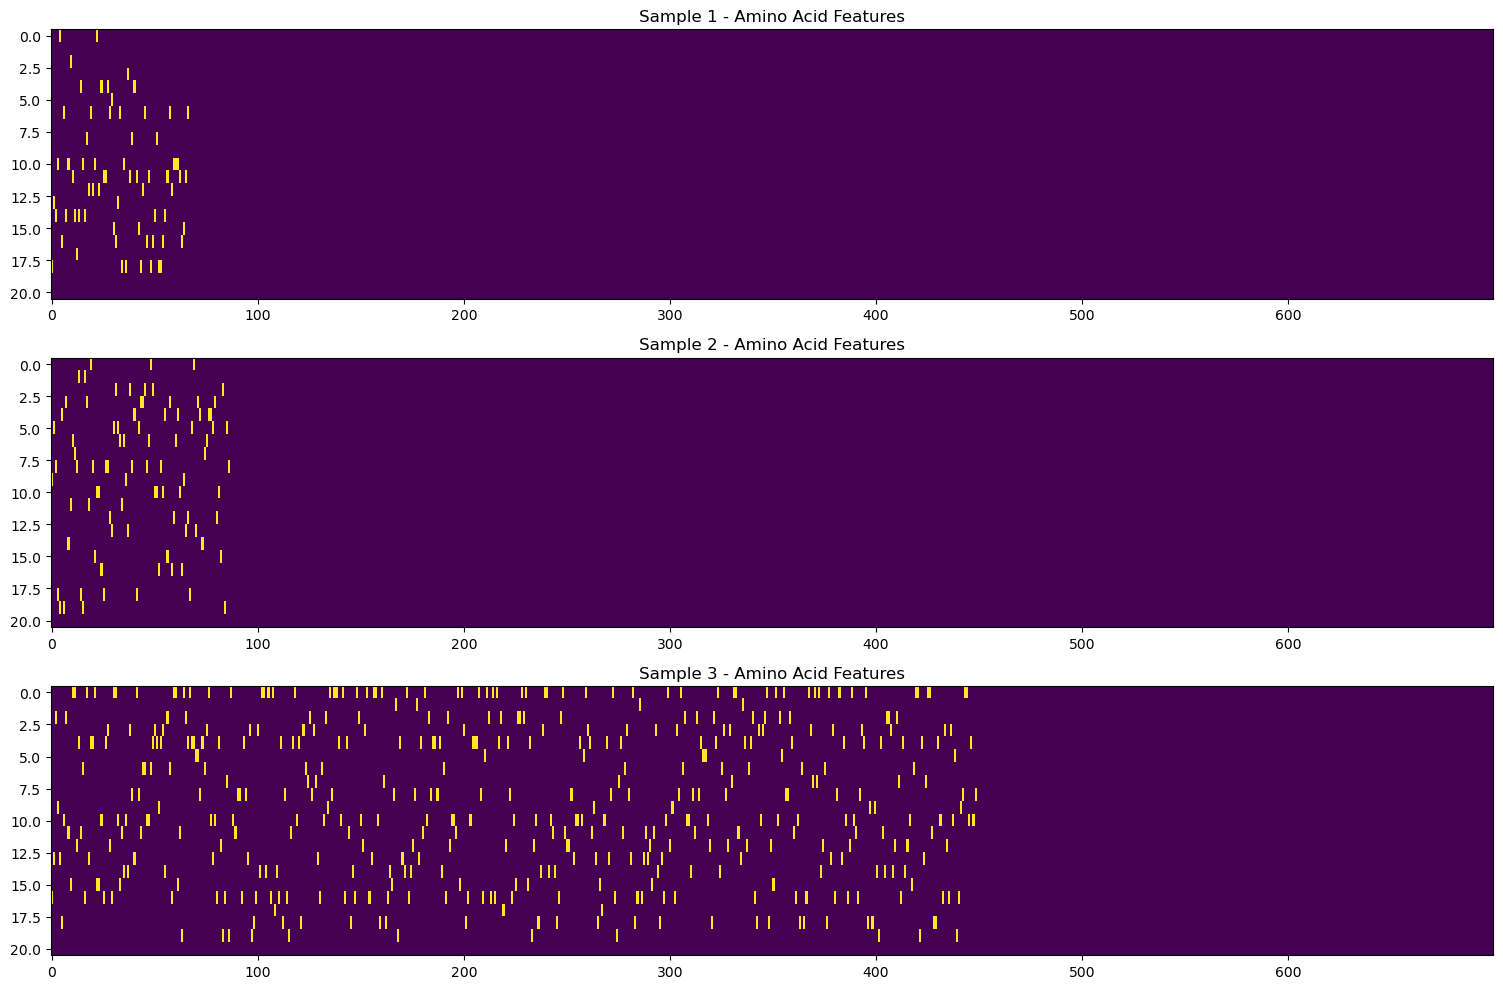

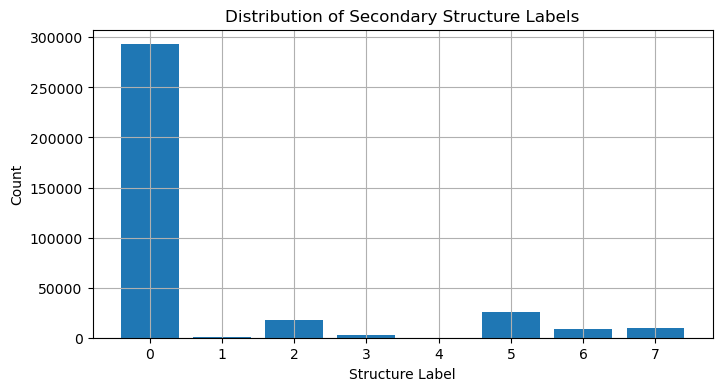

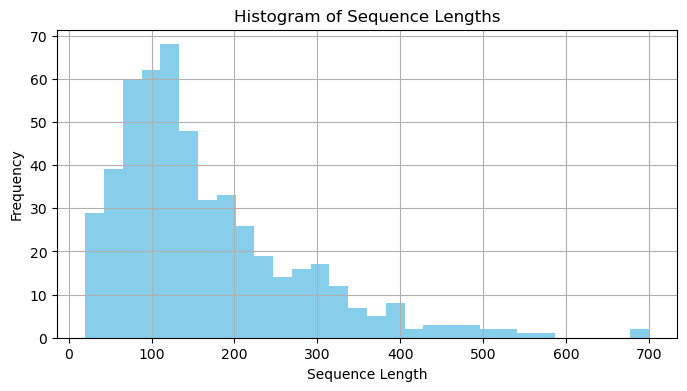

In [7]:
import matplotlib.pyplot as plt

# Print shapes and some statistics
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Shape of seq_len:", seq_len.shape)
print("Sample sequence lengths:", seq_len[:10])
print("Max value in X:", np.max(X))
print("Min value in X:", np.min(X))

# Visualizing the first few amino acid sequences
fig, ax = plt.subplots(3, 1, figsize=(15, 10))
for i in range(3):
    ax[i].imshow(X[i], aspect='auto', interpolation='nearest')
    ax[i].title.set_text(f'Sample {i+1} - Amino Acid Features')
plt.tight_layout()
plt.show()

# Histogram of the labels
plt.figure(figsize=(8, 4))
plt.hist(y.flatten(), bins=np.arange(9) - 0.5, rwidth=0.8)
plt.title('Distribution of Secondary Structure Labels')
plt.xlabel('Structure Label')
plt.ylabel('Count')
plt.xticks(np.arange(8))
plt.grid(True)
plt.show()

# Sequence lengths histogram
plt.figure(figsize=(8, 4))
plt.hist(seq_len, bins=30, color='skyblue')
plt.title('Histogram of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()